# Import bibliotek

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

import torch
from torch import nn
from torchvision import transforms

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tqdm.auto import tqdm
from timeit import default_timer as timer 

import os

from typing import List, Dict

In [3]:
import sys
sys.path.append("../src/")

from data_setup import create_dataloaders
from model_builder import HybridModel
from engine import train_step, test_step, train

# Wczytanie danych

In [4]:
df = pd.read_csv("../data/datasets_sum.csv")
df

,Emotion,Path,Dataset,Emotion_mapped
0,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
1,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
2,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
3,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
4,DISGUST,../data/kaggle/input/speech-emotion-recognitio...,Crema,2
...,...,...,...,...
9390,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9391,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9392,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9393,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0


In [5]:
df = df[df["Dataset"]=="Savee"].reset_index(drop=True)

In [6]:
SAMPLE_RATE = 44100
SEED = 42

In [7]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df["Emotion_mapped"], random_state=SEED)

In [8]:
original_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

In [9]:
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dataframe=train_df, 
    test_dataframe=test_df, 
    original_transform=original_transform, 
    augment_transform=augment_transform,
    batch_size=32
)

In [10]:
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1298d2e10>,
 array(['FEAR', 'NEUTRAL', 'HAPPY', 'ANGRY', 'DISGUST'], dtype=object))

# Model

## Uczenie

In [11]:
from data_setup import create_dataloaders
from engine import train_step, test_step, train

device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"

torch.manual_seed(SEED) 
torch.mps.manual_seed(SEED)

NUM_EPOCHS = 100

model = HybridModel(num_emotions=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

start_time = timer()

model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      epochs=NUM_EPOCHS,
                      device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [01:26<2:22:31, 86.38s/it]

Epoch: 1 | train_loss: 1.5751 | train_acc: 0.3132 | test_loss: 1.5800 | test_acc: 0.3203


  2%|▏         | 2/100 [02:47<2:15:42, 83.08s/it]

Epoch: 2 | train_loss: 1.5412 | train_acc: 0.3255 | test_loss: 1.6000 | test_acc: 0.3203


  3%|▎         | 3/100 [04:07<2:12:26, 81.92s/it]

Epoch: 3 | train_loss: 1.4889 | train_acc: 0.3639 | test_loss: 1.6595 | test_acc: 0.3203


  4%|▍         | 4/100 [05:28<2:10:05, 81.31s/it]

Epoch: 4 | train_loss: 1.4321 | train_acc: 0.3698 | test_loss: 1.7841 | test_acc: 0.3203


  5%|▌         | 5/100 [06:48<2:08:16, 81.01s/it]

Epoch: 5 | train_loss: 1.3781 | train_acc: 0.3887 | test_loss: 1.9521 | test_acc: 0.3203


  6%|▌         | 6/100 [08:11<2:08:05, 81.77s/it]

Epoch: 6 | train_loss: 1.3596 | train_acc: 0.3978 | test_loss: 2.1104 | test_acc: 0.3203


  7%|▋         | 7/100 [09:33<2:06:48, 81.81s/it]

Epoch: 7 | train_loss: 1.3413 | train_acc: 0.4115 | test_loss: 2.2396 | test_acc: 0.3203


  8%|▊         | 8/100 [10:54<2:04:58, 81.51s/it]

Epoch: 8 | train_loss: 1.3202 | train_acc: 0.4271 | test_loss: 2.3798 | test_acc: 0.3203


  9%|▉         | 9/100 [12:15<2:03:33, 81.47s/it]

Epoch: 9 | train_loss: 1.3143 | train_acc: 0.4219 | test_loss: 2.5022 | test_acc: 0.3203


 10%|█         | 10/100 [13:36<2:01:42, 81.14s/it]

Epoch: 10 | train_loss: 1.3180 | train_acc: 0.4167 | test_loss: 2.5139 | test_acc: 0.3203


 11%|█         | 11/100 [14:56<2:00:07, 80.98s/it]

Epoch: 11 | train_loss: 1.2937 | train_acc: 0.4460 | test_loss: 2.6444 | test_acc: 0.3203


 12%|█▏        | 12/100 [16:17<1:58:38, 80.90s/it]

Epoch: 12 | train_loss: 1.2718 | train_acc: 0.4622 | test_loss: 2.7639 | test_acc: 0.3203


 13%|█▎        | 13/100 [17:38<1:57:09, 80.80s/it]

Epoch: 13 | train_loss: 1.2791 | train_acc: 0.4329 | test_loss: 2.8838 | test_acc: 0.3203


 14%|█▍        | 14/100 [18:59<1:55:49, 80.81s/it]

Epoch: 14 | train_loss: 1.2754 | train_acc: 0.4499 | test_loss: 2.4557 | test_acc: 0.3203


 15%|█▌        | 15/100 [20:19<1:54:25, 80.76s/it]

Epoch: 15 | train_loss: 1.2342 | train_acc: 0.4661 | test_loss: 2.9387 | test_acc: 0.3203


 16%|█▌        | 16/100 [21:40<1:53:01, 80.73s/it]

Epoch: 16 | train_loss: 1.2150 | train_acc: 0.4915 | test_loss: 2.8035 | test_acc: 0.3203


 17%|█▋        | 17/100 [23:00<1:51:37, 80.69s/it]

Epoch: 17 | train_loss: 1.2046 | train_acc: 0.4961 | test_loss: 3.0802 | test_acc: 0.3203


 18%|█▊        | 18/100 [24:22<1:50:46, 81.05s/it]

Epoch: 18 | train_loss: 1.2147 | train_acc: 0.4850 | test_loss: 2.7208 | test_acc: 0.3203


 19%|█▉        | 19/100 [25:44<1:49:35, 81.18s/it]

Epoch: 19 | train_loss: 1.1952 | train_acc: 0.4766 | test_loss: 3.1290 | test_acc: 0.3203


 20%|██        | 20/100 [27:04<1:47:54, 80.93s/it]

Epoch: 20 | train_loss: 1.1657 | train_acc: 0.5085 | test_loss: 2.9419 | test_acc: 0.3203


 21%|██        | 21/100 [28:26<1:46:47, 81.10s/it]

Epoch: 21 | train_loss: 1.1507 | train_acc: 0.4779 | test_loss: 3.2008 | test_acc: 0.3203


 22%|██▏       | 22/100 [59:19<13:16:40, 612.83s/it]

Epoch: 22 | train_loss: 1.1469 | train_acc: 0.4980 | test_loss: 2.9898 | test_acc: 0.3203


 23%|██▎       | 23/100 [1:00:42<9:42:33, 453.94s/it]

Epoch: 23 | train_loss: 1.1482 | train_acc: 0.5241 | test_loss: 3.2672 | test_acc: 0.3203


 24%|██▍       | 24/100 [1:02:03<7:13:20, 342.12s/it]

Epoch: 24 | train_loss: 1.1669 | train_acc: 0.5228 | test_loss: 2.9187 | test_acc: 0.3203


 25%|██▌       | 25/100 [1:03:25<5:30:09, 264.12s/it]

Epoch: 25 | train_loss: 1.1023 | train_acc: 0.5521 | test_loss: 3.3407 | test_acc: 0.3203


 26%|██▌       | 26/100 [1:04:47<4:18:04, 209.25s/it]

Epoch: 26 | train_loss: 1.0861 | train_acc: 0.5378 | test_loss: 3.1513 | test_acc: 0.3203


 27%|██▋       | 27/100 [1:06:08<3:27:49, 170.82s/it]

Epoch: 27 | train_loss: 1.1276 | train_acc: 0.5293 | test_loss: 2.8767 | test_acc: 0.3203


 28%|██▊       | 28/100 [1:07:29<2:52:38, 143.87s/it]

Epoch: 28 | train_loss: 1.0978 | train_acc: 0.5371 | test_loss: 3.0471 | test_acc: 0.3203


 29%|██▉       | 29/100 [1:08:49<2:27:44, 124.85s/it]

Epoch: 29 | train_loss: 1.0602 | train_acc: 0.5788 | test_loss: 3.1969 | test_acc: 0.3203


 30%|███       | 30/100 [1:10:39<2:20:28, 120.41s/it]

Epoch: 30 | train_loss: 1.0467 | train_acc: 0.5514 | test_loss: 3.3285 | test_acc: 0.3203


 31%|███       | 31/100 [1:15:32<3:17:47, 171.99s/it]

Epoch: 31 | train_loss: 1.0149 | train_acc: 0.5781 | test_loss: 3.7136 | test_acc: 0.3203


 32%|███▏      | 32/100 [1:16:56<2:45:04, 145.65s/it]

Epoch: 32 | train_loss: 1.0468 | train_acc: 0.5417 | test_loss: 3.0579 | test_acc: 0.3203


 33%|███▎      | 33/100 [1:18:18<2:21:30, 126.72s/it]

Epoch: 33 | train_loss: 1.0254 | train_acc: 0.5566 | test_loss: 2.8874 | test_acc: 0.3203


 34%|███▍      | 34/100 [1:19:40<2:04:38, 113.32s/it]

Epoch: 34 | train_loss: 1.0371 | train_acc: 0.5749 | test_loss: 3.7623 | test_acc: 0.3203


 35%|███▌      | 35/100 [1:21:02<1:52:37, 103.96s/it]

Epoch: 35 | train_loss: 0.9789 | train_acc: 0.5853 | test_loss: 3.2471 | test_acc: 0.3203


 36%|███▌      | 36/100 [1:22:23<1:43:28, 97.01s/it] 

Epoch: 36 | train_loss: 1.0319 | train_acc: 0.5742 | test_loss: 3.7808 | test_acc: 0.3203


 37%|███▋      | 37/100 [1:23:44<1:36:51, 92.25s/it]

Epoch: 37 | train_loss: 0.9939 | train_acc: 0.6074 | test_loss: 3.7871 | test_acc: 0.3203


 38%|███▊      | 38/100 [1:25:05<1:31:51, 88.90s/it]

Epoch: 38 | train_loss: 0.9730 | train_acc: 0.6165 | test_loss: 2.8057 | test_acc: 0.3516


 39%|███▉      | 39/100 [1:26:26<1:27:55, 86.48s/it]

Epoch: 39 | train_loss: 0.9449 | train_acc: 0.5918 | test_loss: 3.7986 | test_acc: 0.3203


 40%|████      | 40/100 [1:27:47<1:24:42, 84.72s/it]

Epoch: 40 | train_loss: 0.9703 | train_acc: 0.6009 | test_loss: 2.9852 | test_acc: 0.3438


 41%|████      | 41/100 [1:29:07<1:22:02, 83.44s/it]

Epoch: 41 | train_loss: 0.9149 | train_acc: 0.6341 | test_loss: 3.0900 | test_acc: 0.3438


 42%|████▏     | 42/100 [1:30:29<1:20:03, 82.82s/it]

Epoch: 42 | train_loss: 0.9126 | train_acc: 0.6172 | test_loss: 3.0842 | test_acc: 0.3516


 43%|████▎     | 43/100 [1:31:50<1:18:18, 82.43s/it]

Epoch: 43 | train_loss: 0.9171 | train_acc: 0.6165 | test_loss: 3.2900 | test_acc: 0.3203


 44%|████▍     | 44/100 [1:33:11<1:16:35, 82.07s/it]

Epoch: 44 | train_loss: 0.9460 | train_acc: 0.6328 | test_loss: 3.1913 | test_acc: 0.3281


 45%|████▌     | 45/100 [1:34:32<1:14:52, 81.69s/it]

Epoch: 45 | train_loss: 0.9179 | train_acc: 0.6159 | test_loss: 4.0444 | test_acc: 0.3203


 46%|████▌     | 46/100 [1:35:53<1:13:11, 81.33s/it]

Epoch: 46 | train_loss: 0.9464 | train_acc: 0.6367 | test_loss: 2.9106 | test_acc: 0.3880


 47%|████▋     | 47/100 [1:37:14<1:11:55, 81.42s/it]

Epoch: 47 | train_loss: 0.9329 | train_acc: 0.6452 | test_loss: 3.1027 | test_acc: 0.3438


 48%|████▊     | 48/100 [1:38:36<1:10:30, 81.36s/it]

Epoch: 48 | train_loss: 0.8747 | train_acc: 0.6543 | test_loss: 3.2792 | test_acc: 0.3203


 49%|████▉     | 49/100 [1:39:56<1:08:55, 81.10s/it]

Epoch: 49 | train_loss: 0.8384 | train_acc: 0.6660 | test_loss: 3.1815 | test_acc: 0.3438


 50%|█████     | 50/100 [1:41:17<1:07:36, 81.12s/it]

Epoch: 50 | train_loss: 0.8570 | train_acc: 0.6712 | test_loss: 3.1908 | test_acc: 0.3438


 51%|█████     | 51/100 [1:42:39<1:06:25, 81.33s/it]

Epoch: 51 | train_loss: 0.8493 | train_acc: 0.6751 | test_loss: 3.2769 | test_acc: 0.3281


 52%|█████▏    | 52/100 [1:44:00<1:04:53, 81.12s/it]

Epoch: 52 | train_loss: 0.8579 | train_acc: 0.6628 | test_loss: 3.8363 | test_acc: 0.3203


 53%|█████▎    | 53/100 [1:45:20<1:03:24, 80.95s/it]

Epoch: 53 | train_loss: 0.8316 | train_acc: 0.6660 | test_loss: 3.5033 | test_acc: 0.3203


 54%|█████▍    | 54/100 [1:46:42<1:02:10, 81.09s/it]

Epoch: 54 | train_loss: 0.8067 | train_acc: 0.6823 | test_loss: 3.0357 | test_acc: 0.3516


 55%|█████▌    | 55/100 [1:48:03<1:00:51, 81.15s/it]

Epoch: 55 | train_loss: 0.8161 | train_acc: 0.6836 | test_loss: 3.3882 | test_acc: 0.3203


 56%|█████▌    | 56/100 [1:49:24<59:26, 81.06s/it]  

Epoch: 56 | train_loss: 0.8101 | train_acc: 0.6927 | test_loss: 3.3985 | test_acc: 0.3281


 57%|█████▋    | 57/100 [1:50:45<58:02, 80.98s/it]

Epoch: 57 | train_loss: 0.8335 | train_acc: 0.6888 | test_loss: 3.4365 | test_acc: 0.3203


 58%|█████▊    | 58/100 [1:52:06<56:46, 81.12s/it]

Epoch: 58 | train_loss: 0.8314 | train_acc: 0.6986 | test_loss: 2.9354 | test_acc: 0.3516


 59%|█████▉    | 59/100 [1:53:27<55:26, 81.15s/it]

Epoch: 59 | train_loss: 0.7813 | train_acc: 0.7142 | test_loss: 2.9573 | test_acc: 0.3672


 60%|██████    | 60/100 [1:54:49<54:10, 81.27s/it]

Epoch: 60 | train_loss: 0.7482 | train_acc: 0.7188 | test_loss: 3.2480 | test_acc: 0.3359


 61%|██████    | 61/100 [1:56:10<52:50, 81.29s/it]

Epoch: 61 | train_loss: 0.7948 | train_acc: 0.6842 | test_loss: 3.1762 | test_acc: 0.3438


 62%|██████▏   | 62/100 [1:57:31<51:21, 81.08s/it]

Epoch: 62 | train_loss: 0.7570 | train_acc: 0.7174 | test_loss: 2.9853 | test_acc: 0.3672


 63%|██████▎   | 63/100 [1:58:53<50:07, 81.28s/it]

Epoch: 63 | train_loss: 0.7570 | train_acc: 0.7083 | test_loss: 2.8628 | test_acc: 0.3750


 64%|██████▍   | 64/100 [2:00:14<48:44, 81.24s/it]

Epoch: 64 | train_loss: 0.7309 | train_acc: 0.7233 | test_loss: 3.2004 | test_acc: 0.3438


 65%|██████▌   | 65/100 [2:01:35<47:27, 81.34s/it]

Epoch: 65 | train_loss: 0.7607 | train_acc: 0.6901 | test_loss: 3.3116 | test_acc: 0.3203


 66%|██████▌   | 66/100 [2:02:57<46:04, 81.32s/it]

Epoch: 66 | train_loss: 0.7793 | train_acc: 0.7077 | test_loss: 2.8464 | test_acc: 0.3438


 67%|██████▋   | 67/100 [2:04:18<44:43, 81.31s/it]

Epoch: 67 | train_loss: 0.7409 | train_acc: 0.7070 | test_loss: 3.0907 | test_acc: 0.3594


 68%|██████▊   | 68/100 [2:05:39<43:21, 81.30s/it]

Epoch: 68 | train_loss: 0.7556 | train_acc: 0.7174 | test_loss: 3.1866 | test_acc: 0.3281


 69%|██████▉   | 69/100 [2:07:00<41:55, 81.13s/it]

Epoch: 69 | train_loss: 0.6998 | train_acc: 0.7331 | test_loss: 3.0574 | test_acc: 0.3359


 70%|███████   | 70/100 [2:08:20<40:29, 80.98s/it]

Epoch: 70 | train_loss: 0.7060 | train_acc: 0.7220 | test_loss: 3.0338 | test_acc: 0.3438


 71%|███████   | 71/100 [2:09:41<39:07, 80.94s/it]

Epoch: 71 | train_loss: 0.6710 | train_acc: 0.7552 | test_loss: 3.9433 | test_acc: 0.3203


 72%|███████▏  | 72/100 [2:11:02<37:43, 80.85s/it]

Epoch: 72 | train_loss: 0.6439 | train_acc: 0.7467 | test_loss: 3.4429 | test_acc: 0.3438


 73%|███████▎  | 73/100 [2:12:23<36:24, 80.90s/it]

Epoch: 73 | train_loss: 0.6328 | train_acc: 0.7760 | test_loss: 3.2631 | test_acc: 0.3281


 74%|███████▍  | 74/100 [2:13:44<35:01, 80.83s/it]

Epoch: 74 | train_loss: 0.6801 | train_acc: 0.7292 | test_loss: 3.1531 | test_acc: 0.3516


 75%|███████▌  | 75/100 [2:15:05<33:41, 80.86s/it]

Epoch: 75 | train_loss: 0.6558 | train_acc: 0.7461 | test_loss: 3.3104 | test_acc: 0.3203


 76%|███████▌  | 76/100 [2:16:26<32:26, 81.09s/it]

Epoch: 76 | train_loss: 0.6658 | train_acc: 0.7598 | test_loss: 3.3001 | test_acc: 0.3672


 77%|███████▋  | 77/100 [2:17:47<31:02, 80.99s/it]

Epoch: 77 | train_loss: 0.6225 | train_acc: 0.7539 | test_loss: 3.1689 | test_acc: 0.3594


 78%|███████▊  | 78/100 [2:19:08<29:39, 80.89s/it]

Epoch: 78 | train_loss: 0.6297 | train_acc: 0.7878 | test_loss: 3.1620 | test_acc: 0.3516


 79%|███████▉  | 79/100 [2:20:29<28:20, 80.98s/it]

Epoch: 79 | train_loss: 0.6508 | train_acc: 0.7500 | test_loss: 3.5065 | test_acc: 0.3281


 80%|████████  | 80/100 [2:21:49<26:56, 80.84s/it]

Epoch: 80 | train_loss: 0.6163 | train_acc: 0.7565 | test_loss: 3.8223 | test_acc: 0.3281


 81%|████████  | 81/100 [2:23:11<25:38, 80.97s/it]

Epoch: 81 | train_loss: 0.5369 | train_acc: 0.8014 | test_loss: 2.9826 | test_acc: 0.3594


 82%|████████▏ | 82/100 [2:24:32<24:17, 80.96s/it]

Epoch: 82 | train_loss: 0.6030 | train_acc: 0.7721 | test_loss: 3.2474 | test_acc: 0.3281


 83%|████████▎ | 83/100 [2:25:52<22:55, 80.91s/it]

Epoch: 83 | train_loss: 0.6564 | train_acc: 0.7591 | test_loss: 4.0377 | test_acc: 0.3203


 84%|████████▍ | 84/100 [2:27:13<21:33, 80.86s/it]

Epoch: 84 | train_loss: 0.6495 | train_acc: 0.7546 | test_loss: 3.6870 | test_acc: 0.3203


 85%|████████▌ | 85/100 [2:28:34<20:11, 80.80s/it]

Epoch: 85 | train_loss: 0.6547 | train_acc: 0.7533 | test_loss: 3.3482 | test_acc: 0.3594


 86%|████████▌ | 86/100 [2:29:55<18:53, 80.99s/it]

Epoch: 86 | train_loss: 0.5926 | train_acc: 0.7858 | test_loss: 3.5260 | test_acc: 0.3203


 87%|████████▋ | 87/100 [2:31:19<17:42, 81.71s/it]

Epoch: 87 | train_loss: 0.5732 | train_acc: 0.7832 | test_loss: 3.3701 | test_acc: 0.3672


 88%|████████▊ | 88/100 [2:32:40<16:19, 81.61s/it]

Epoch: 88 | train_loss: 0.5487 | train_acc: 0.7865 | test_loss: 3.4568 | test_acc: 0.3438


 89%|████████▉ | 89/100 [2:34:01<14:54, 81.32s/it]

Epoch: 89 | train_loss: 0.5839 | train_acc: 0.7812 | test_loss: 3.9418 | test_acc: 0.3281


 90%|█████████ | 90/100 [2:35:22<13:32, 81.24s/it]

Epoch: 90 | train_loss: 0.5946 | train_acc: 0.7871 | test_loss: 3.4536 | test_acc: 0.3594


 91%|█████████ | 91/100 [2:36:43<12:12, 81.35s/it]

Epoch: 91 | train_loss: 0.5458 | train_acc: 0.7930 | test_loss: 3.2247 | test_acc: 0.3438


 92%|█████████▏| 92/100 [2:38:05<10:51, 81.47s/it]

Epoch: 92 | train_loss: 0.6170 | train_acc: 0.7546 | test_loss: 3.3672 | test_acc: 0.3438


 93%|█████████▎| 93/100 [2:39:27<09:30, 81.53s/it]

Epoch: 93 | train_loss: 0.5360 | train_acc: 0.7923 | test_loss: 4.1369 | test_acc: 0.3203


 94%|█████████▍| 94/100 [2:40:47<08:07, 81.20s/it]

Epoch: 94 | train_loss: 0.5674 | train_acc: 0.7936 | test_loss: 4.0259 | test_acc: 0.3203


 95%|█████████▌| 95/100 [2:42:38<07:29, 90.00s/it]

Epoch: 95 | train_loss: 0.5248 | train_acc: 0.8053 | test_loss: 3.9869 | test_acc: 0.3203


 96%|█████████▌| 96/100 [2:44:55<06:56, 104.13s/it]

Epoch: 96 | train_loss: 0.6185 | train_acc: 0.7669 | test_loss: 3.7777 | test_acc: 0.3516


 97%|█████████▋| 97/100 [2:46:17<04:52, 97.51s/it] 

Epoch: 97 | train_loss: 0.5699 | train_acc: 0.7943 | test_loss: 3.0925 | test_acc: 0.3281


 98%|█████████▊| 98/100 [2:47:38<03:05, 92.74s/it]

Epoch: 98 | train_loss: 0.5354 | train_acc: 0.8060 | test_loss: 3.9313 | test_acc: 0.3281


 99%|█████████▉| 99/100 [2:48:59<01:29, 89.25s/it]

Epoch: 99 | train_loss: 0.5214 | train_acc: 0.8086 | test_loss: 3.3908 | test_acc: 0.3516


100%|██████████| 100/100 [2:50:20<00:00, 102.21s/it]

Epoch: 100 | train_loss: 0.5298 | train_acc: 0.7995 | test_loss: 2.9923 | test_acc: 0.3672
Total training time: 8130.494 seconds


In [12]:
# Check the model_0_results keys
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [13]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

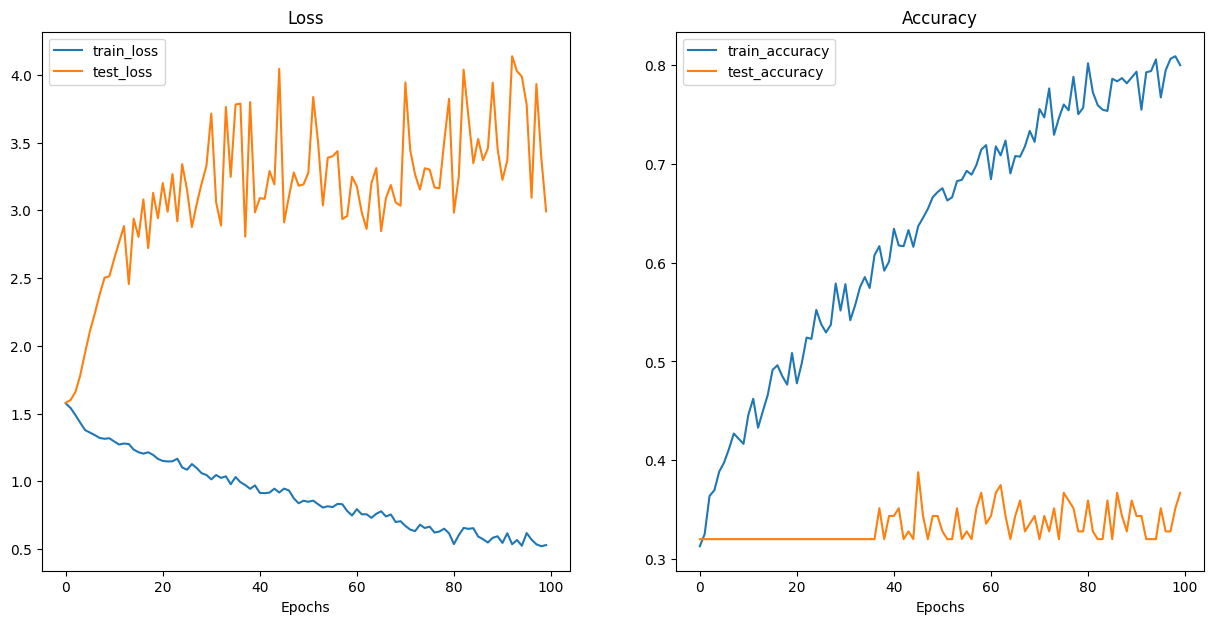

In [14]:
plot_loss_curves(model_results)

## Zapisanie modelu

In [15]:
model_save_path = "../models/cnn_lstm_model_savee.pth"

torch.save(obj=model.state_dict(),
             f=model_save_path)